In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

dataset = pd.read_csv('titanic.csv')
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print(len(dataset))

891


<AxesSubplot:xlabel='Survived', ylabel='count'>

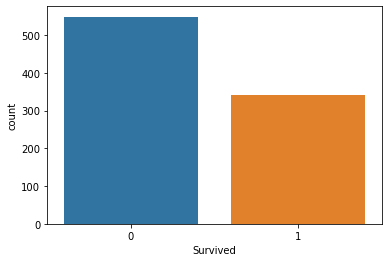

In [6]:
sns.countplot(x='Survived',data=dataset)

<AxesSubplot:xlabel='Survived', ylabel='count'>

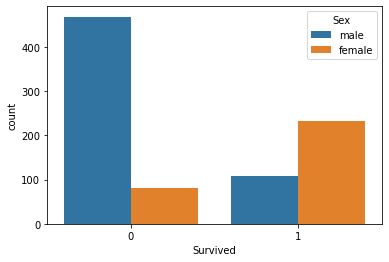

In [7]:
sns.countplot(x='Survived',hue='Sex',data=dataset)

<AxesSubplot:xlabel='Survived', ylabel='count'>

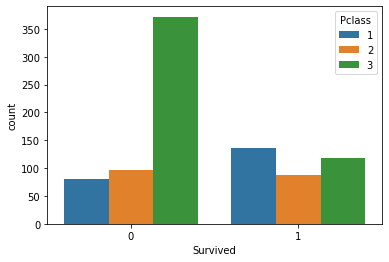

In [8]:
sns.countplot(x='Survived',hue='Pclass',data=dataset)

<AxesSubplot:ylabel='Frequency'>

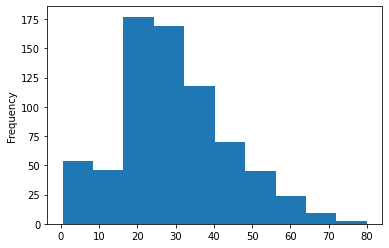

In [9]:
dataset['Age'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

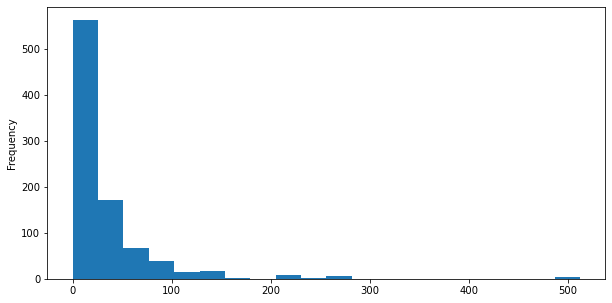

In [11]:
dataset['Fare'].plot.hist(bins=20, figsize=(10,5) )

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
dataset.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

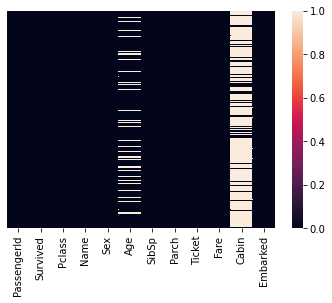

In [16]:
sns.heatmap(dataset.isnull(),yticklabels=False)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

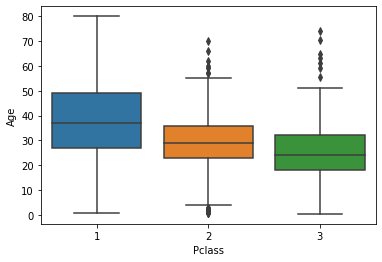

In [17]:
sns.boxplot(x='Pclass',y='Age',data=dataset)

In [10]:
dataset.drop('Cabin',axis=1,inplace=True)

In [11]:
dataset.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,3,22.0,1,0,7.2500,1,0,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,1
3,1,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,3,35.0,0,0,8.0500,1,0,1,0,1


<AxesSubplot:>

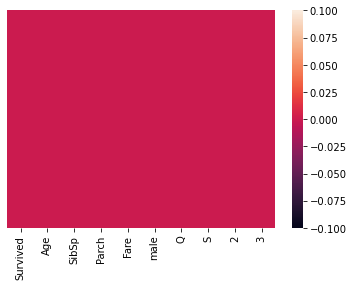

In [28]:
dataset.dropna(inplace=True)
sns.heatmap(dataset.isnull(),yticklabels=False)

In [29]:
dataset.isnull().sum()

Survived    0
Age         0
SibSp       0
Parch       0
Fare        0
male        0
Q           0
S           0
2           0
3           0
dtype: int64

In [3]:
pd.get_dummies(dataset['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [4]:
sex = pd.get_dummies(dataset['Sex'],drop_first=True)
sex.head(2)

,male
0,1
1,0


In [5]:
embarked = pd.get_dummies(dataset['Embarked'],drop_first=True)
embarked.head(2)

,Q,S
0,0,1
1,0,0


In [6]:
pcl = pd.get_dummies(dataset['Pclass'],drop_first=True)
pcl.head(2)

,2,3
0,0,1
1,0,0


In [7]:
dataset = pd.concat([dataset,sex,embarked,pcl],axis=1)
dataset.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,0,0


In [13]:
dataset.drop(['PassengerId','Sex','Name','Embarked','Ticket'],axis=1,inplace=True)
dataset.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,3,22.0,1,0,7.2500,1,0,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,1
3,1,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,3,35.0,0,0,8.0500,1,0,1,0,1


In [31]:
#dataset.drop('Pclass',axis=1,inplace=True)
dataset.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


In [32]:
x=dataset.drop('Survived',axis=1)
y=dataset['Survived']

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [34]:
logis = LogisticRegression()
print(x_train,y_train)

      Age  SibSp  Parch      Fare  male  Q  S  2  3
641  24.0      0      0   69.3000     0  0  0  0  0
433  17.0      0      0    7.1250     1  0  1  0  1
202  34.0      0      0    6.4958     1  0  1  0  1
585  18.0      0      2   79.6500     0  0  1  0  0
544  50.0      1      0  106.4250     1  0  0  0  0
..    ...    ...    ...       ...   ... .. .. .. ..
179  36.0      0      0    0.0000     1  0  1  0  1
808  39.0      0      0   13.0000     1  0  1  1  0
93   26.0      1      2   20.5750     1  0  1  0  1
291  19.0      1      0   91.0792     0  0  0  0  0
51   21.0      0      0    7.8000     1  0  1  0  1

[499 rows x 9 columns] 641    1
433    0
202    0
585    1
544    0
      ..
179    0
808    0
93     0
291    1
51     0
Name: Survived, Length: 499, dtype: int64


In [35]:
logis.fit(x_train,y_train)

C:\Users\sourab\Anaconda3\envs\nural_network\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()